In [49]:
import pandas as pd
import numpy as np

In [50]:
df = pd.read_csv(r"C:\Users\saikr\Documents\BAJAJFINSV.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [51]:
df.set_index('Date',inplace=True)

#### Plotting the target variable VWAP over time

<Axes: xlabel='Date'>

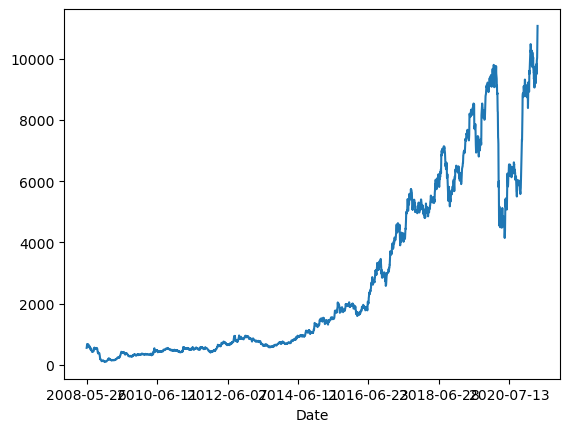

In [53]:
df['VWAP'].plot()

In [56]:
df.shape

(3201, 14)

In [57]:
df.isna().sum()

Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                745
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [58]:
df.dropna(inplace=True)

In [59]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [60]:
df.shape

(2456, 14)

In [61]:
data=df.copy()

In [62]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [63]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [64]:
data[['Open', 'High', 'Low', 'Close']].corr()

,Open,High,Low,Close
Open,1.000000,0.999690,0.999655,0.999413
High,0.999690,1.000000,0.999480,0.999745
Low,0.999655,0.999480,1.000000,0.999695
Close,0.999413,0.999745,0.999695,1.000000


In [65]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [66]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [67]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [68]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJAJFINSV,EQ,518.40,521.8,528.95,517.1,521.10,521.05,522.81,113360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJAJFINSV,EQ,521.05,518.8,519.85,504.0,514.95,512.45,513.71,62967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJAJFINSV,EQ,512.45,512.5,520.00,506.0,507.10,508.40,513.11,36445,...,5.211126,NaN,7.057148,NaN,39069.997351,NaN,2.064161e+12,NaN,1237.121255,NaN
2011-06-06,BAJAJFINSV,EQ,508.40,508.0,508.00,496.0,502.25,502.25,501.92,33537,...,6.885310,NaN,5.291503,NaN,16217.263682,NaN,8.469340e+11,NaN,551.246164,NaN
2011-06-07,BAJAJFINSV,EQ,502.25,503.0,552.00,503.0,546.50,545.50,536.79,1237385,...,22.744963,NaN,5.131601,NaN,694204.022264,NaN,3.732262e+13,NaN,20032.206344,NaN


In [69]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [70]:
data.shape

(2456, 34)

In [71]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [72]:
data.dropna(inplace=True)

In [73]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [74]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [75]:
data.shape

(2450, 34)

In [76]:
training_data=data[0:1800]
test_data=data[1800:]

In [77]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJAJFINSV,EQ,560.75,559.75,574.40,545.20,563.00,564.20,564.84,1072031,...,11.227088,25.366481,21.815820,18.134406,82924.424540,588810.697885,2.974668e+12,3.246176e+13,2739.564260,16706.647648
2011-06-10,BAJAJFINSV,EQ,564.20,567.10,573.45,555.60,557.80,560.90,565.45,540701,...,5.433461,28.078483,10.954603,23.823448,337106.750014,559645.522999,1.849608e+13,3.081861e+13,8525.032727,15906.609064
2011-06-13,BAJAJFINSV,EQ,560.90,564.05,565.60,546.05,550.50,550.65,555.53,165282,...,4.829855,26.643267,5.774729,24.266892,455603.033254,544639.548097,2.580459e+13,2.994149e+13,12860.736099,15516.192893
2011-06-14,BAJAJFINSV,EQ,550.65,552.45,568.90,551.00,552.00,552.50,560.41,205216,...,3.941552,23.320303,4.776069,23.886410,206189.368923,518252.959225,1.173877e+13,2.842803e+13,6572.812513,14606.885007
2011-06-15,BAJAJFINSV,EQ,552.50,556.00,565.70,546.00,548.05,548.15,557.41,140596,...,1.877054,7.437061,2.872426,17.666585,32608.453280,498885.976619,1.853133e+12,2.730280e+13,1654.238294,13968.688219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,BAJAJFINSV,EQ,6652.90,6660.00,6673.80,6480.05,6516.00,6508.20,6548.00,391449,...,147.703622,152.993847,123.160468,192.771028,105638.063992,87163.183045,6.649353e+13,5.468851e+13,14917.157538,12100.612846
2018-09-05,BAJAJFINSV,EQ,6508.20,6500.00,6559.15,6401.00,6509.55,6503.05,6489.04,182931,...,141.211299,196.500199,113.604141,215.735472,116740.704418,82722.686103,7.576472e+13,5.234771e+13,15482.052911,11934.079074
2018-09-06,BAJAJFINSV,EQ,6503.05,6520.00,6574.90,6458.90,6526.00,6547.30,6524.52,155679,...,62.147533,204.231029,40.923984,207.523839,128976.690871,81411.196037,8.483177e+13,5.235383e+13,14760.682448,11806.374545


In [80]:
from pmdarima import auto_arima

In [100]:
import pmdarima
pmdarima.__version__


'2.0.4'

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
model = auto_arima(y=training_data['VWAP'], X=training_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=17180.326, Time=6.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=17878.398, Time=3.72 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17495.742, Time=4.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=17239.586, Time=5.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=29569.396, Time=3.85 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=18192.166, Time=6.44 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=17218.130, Time=5.70 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=17374.012, Time=6.41 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=17165.579, Time=6.73 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=17164.391, Time=6.45 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=17208.289, Time=6.20 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=17166.387, Time=7.54 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=17277.384, Time=5.67 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=17204.834, Time=7.35 sec
 ARIMA(2,0,4)(0,0,0

In [84]:
model.fit(y=training_data['VWAP'], X=training_data[ind_features])

##  model.fit(y=training_data['VWAP'] , exogenous= training_data[ind_features])

ARIMA(order=(1, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [85]:
forecast = model.predict(n_periods=len(test_data), X=test_data[ind_features])

In [86]:
forecast

1800     6367.427252
1801     6394.301587
1802     6532.718070
1803     6604.582923
1804     6640.638046
            ...     
2445     9927.958793
2446     9969.797040
2447    10244.570027
2448    10864.421183
2449    11295.878555
Length: 650, dtype: float64

In [102]:
test_data['Forecast_ARIMA']= forecast.values

In [104]:
test_data['Forecast_ARIMA']

Date
2018-09-11     6367.427252
2018-09-12     6394.301587
2018-09-14     6532.718070
2018-09-17     6604.582923
2018-09-18     6640.638046
                  ...     
2021-04-26     9927.958793
2021-04-27     9969.797040
2021-04-28    10244.570027
2021-04-29    10864.421183
2021-04-30    11295.878555
Name: Forecast_ARIMA, Length: 650, dtype: float64

<Axes: xlabel='Date'>

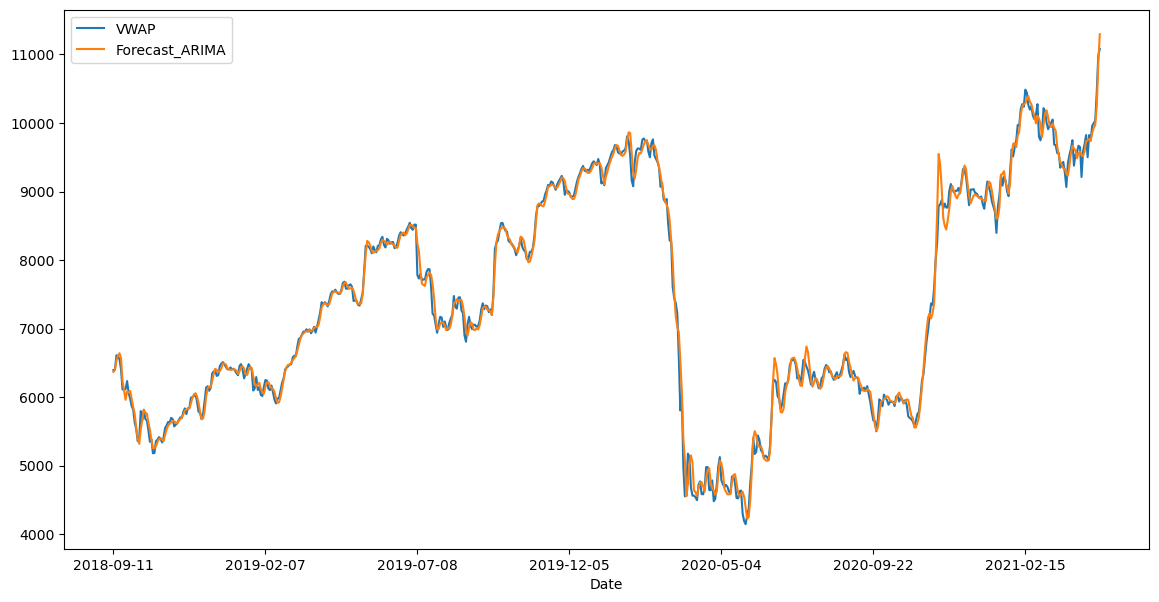

In [106]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

In [108]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [110]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

127.77743908092293

In [112]:
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

87.29160058958699